In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns# 1. Cargar datos

In [2]:
# 1. Cargar datos
df = pd.read_csv("C:\\Users\\janin\\Downloads\\samsung.csv")
X = df[["Close","Volume"]].dropna()
print("Dimensiones:", X.shape)

Dimensiones: (2850, 2)


In [3]:
# 2. Escalado
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

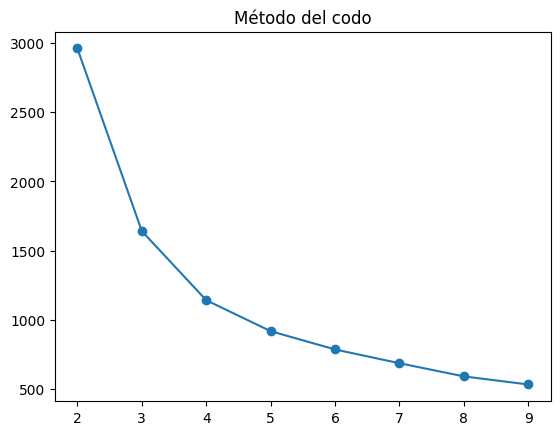

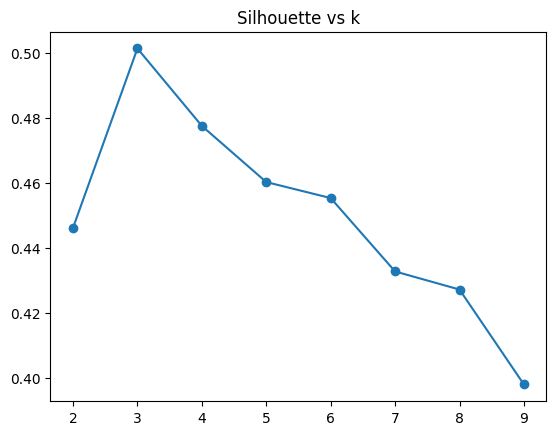

In [4]:
# 3. Método del codo y silhouette
inertias, silhouettes = [], []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(Xs)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(Xs, labels))

plt.plot(range(2,10), inertias, "-o"); plt.title("Método del codo"); plt.show()
plt.plot(range(2,10), silhouettes, "-o"); plt.title("Silhouette vs k"); plt.show()

In [5]:
# 4. Modelo final
k_opt = 3
km = KMeans(n_clusters=k_opt, random_state=42, n_init=50)
labels = km.fit_predict(Xs)
df["cluster"] = labels

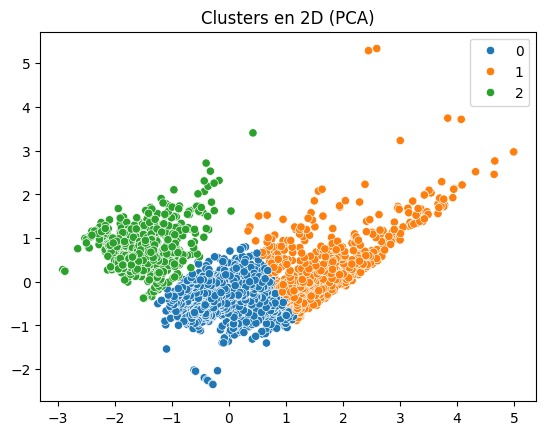

In [6]:
# 5. Visualización PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(Xs)
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=labels, palette="tab10")
plt.title("Clusters en 2D (PCA)")
plt.show()

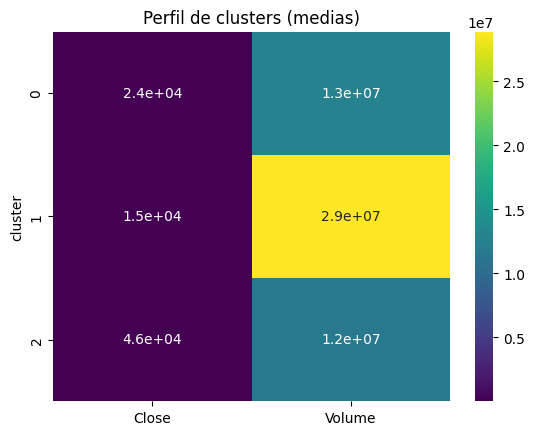

In [7]:
# 6. Perfil de clusters
cluster_profile = df.groupby("cluster").mean(numeric_only=True)
sns.heatmap(cluster_profile, cmap="viridis", annot=True)
plt.title("Perfil de clusters (medias)")
plt.show()

In [8]:
# 7. Métricas adicionales
print("Silhouette final:", silhouette_score(Xs, labels))
print("Calinski-Harabasz:", calinski_harabasz_score(Xs, labels))

Silhouette final: 0.5012588972909432
Calinski-Harabasz: 3520.6579512488993
